In [1]:
import Quandl
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [54]:
mu, sigma = 0, 0.1 # mean and standard deviation
x0 = np.random.normal(mu, sigma, 500)
y0 = np.random.normal(mu, sigma, 500)

mu, sigma = 0.25, 0.1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, 500)
y1 = np.random.normal(mu, sigma, 500)

mu, sigma = 0.5, 0.1 # mean and standard deviation
x2 = np.random.normal(mu, sigma, 500)
y2 = np.random.normal(mu, sigma, 500)

x = np.concatenate((x0,x1,x2))
y = np.concatenate((y0,y1,y2))

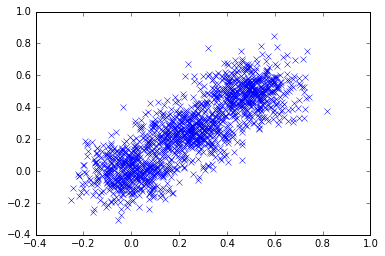

In [55]:
fig, ax = plt.subplots()
ax.plot(x,y,'x')

number of estimated clusters : 1


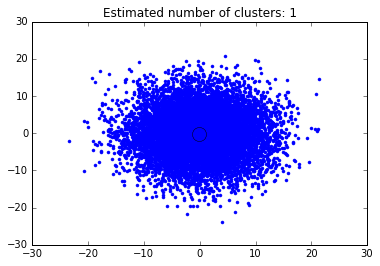

In [69]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

###############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1,1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=6)

###############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.25, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

###############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()